In [1]:
import pandas as pd
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import consensus_score

In [2]:
%matplotlib inline

In [14]:
# Load the data
df = pd.read_csv('testfile_2023-11-11-15:35:40_random_forest', header = 0, usecols=range(num_columns - 1))  # Adjust the path as needed

In [16]:
matrix = df.values

In [17]:
rows = [row for row in matrix]
columns = [matrix[:, i] for i in range(matrix.shape[1])]
# Get the number of rows and columns
num_rows, num_columns = matrix.shape

# row indices
row_idx = np.arange(num_rows)

# column indices
col_idx = np.arange(num_columns)

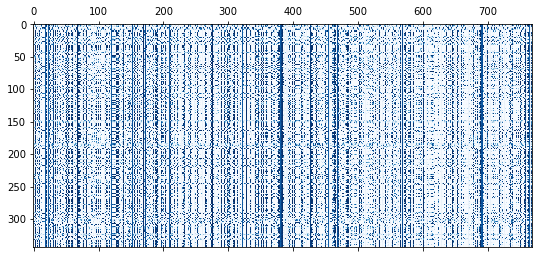

In [19]:
plt.matshow(matrix, cmap=plt.cm.Blues)

In [20]:
model = SpectralBiclustering(n_clusters=2, random_state=0)
model.fit(matrix)

SpectralBiclustering(n_clusters=2, random_state=0)

In [21]:
rows_labels = model.row_labels_
columns_labels = model.column_labels_

In [22]:
fit_matrix = matrix[np.argsort(rows_labels)]
fit_matrix = fit_matrix[:,np.argsort(columns_labels)]

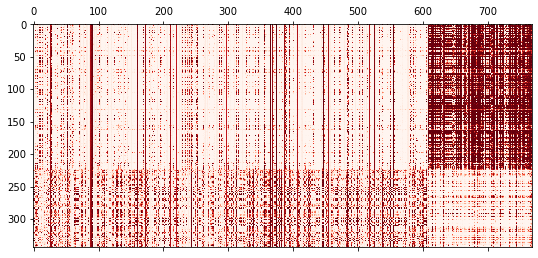

In [23]:
plt.matshow(fit_matrix, cmap=plt.cm.Reds)

In [24]:
for cluster_num in range(2):  # Assuming you have 2 clusters
    # Find rows and columns in this cluster
    rows_in_cluster = np.where(rows_labels == cluster_num)[0]
    columns_in_cluster = np.where(columns_labels == cluster_num)[0]

    print(f"Cluster {cluster_num}:")
    print(f"Rows: {rows_in_cluster}")
    print(f"Columns: {columns_in_cluster}")

    # If you want to see the data in this cluster
    cluster_data = matrix[np.ix_(rows_in_cluster, columns_in_cluster)]
    print(f"Data in Cluster {cluster_num}:\n{cluster_data}\n")

Cluster 0:
Rows: [  0   1   2   3   4   5  10  11  12  14  15  16  17  18  19  21  23  24
  27  29  30  31  32  34  35  36  37  38  39  40  42  43  44  46  48  53
  54  56  57  58  60  61  62  64  65  68  70  71  72  73  77  80  81  82
  83  84  86  87  89  90  91  92  93  94  96  98  99 101 102 103 104 105
 106 110 111 112 113 115 117 118 120 123 124 126 128 129 130 132 133 135
 136 137 140 142 144 145 146 147 148 151 152 153 154 155 156 157 158 161
 162 163 168 169 170 172 173 174 175 176 178 181 183 184 189 190 193 194
 195 197 198 200 202 203 204 205 206 207 211 212 213 215 216 217 221 222
 224 225 226 227 228 229 230 231 233 234 236 239 240 241 242 243 244 245
 247 249 250 251 252 254 256 257 258 259 260 263 264 265 267 269 271 272
 274 275 277 279 280 281 282 284 285 286 287 289 290 294 295 296 298 299
 302 305 308 309 310 311 314 315 317 318 319 320 321 322 327 329 331 333
 334 335 337 338 339 340 341 342 343]
Columns: [  0   1   2   4   5   7   8  11  12  13  14  15  16  17  18

In [25]:
columns_in_first_cluster = columns_in_cluster = np.where(columns_labels == 0)[0]
columns_in_second_cluster = columns_in_cluster = np.where(columns_labels == 1)[0]

from proto_drop_vis import visualize_topk_dropped
import os

cwd = os.getcwd()

proto_dropped  = columns_in_first_cluster
proto_kept = columns_in_second_cluster
LOG_DIR = os.path.join(cwd, "runs/plankton_biclustering_768_protos")
PATH_TRAINED_MODEL =  os.path.join(cwd, "runs/plankton/checkpoints/net_trained_60")
to_sample  = 20

In [26]:
visualize_topk_dropped(proto_dropped, proto_kept, LOG_DIR, PATH_TRAINED_MODEL, 'biclusterring_protos_768', k=10, to_sample=to_sample)

CUDA device set without id specification
Device used:  cuda with id [0]
Number of prototypes:  768
chosen network is convnext
Pretrained network loaded
Num classes (k) =  86 ['Amphidinium_sp', 'Asterionellopsis', 'Cerataulina', 'Cerataulina_flagellate', 'Ceratium'] etc.
Visualizing prototypes for topk...


/sw/arch/RHEL8/EB_production/2022/software/PyTorch/1.12.0-foss-2022a-CUDA-11.7.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

0 prototypes do not have any similarity score > 0.1. Will be ignored in visualisation.



Visualizing topk: 100% 3096/3096 [01:47<00:00, 28.81it/s]

Abstained:  0
